#**Project : Automatic Ticket Assignment**


##Milestone 1 : Pre-Processing, Data Visualisation and EDA

**Problem Statement** : Incident management system in an organisation. Incidents are generally interruptions in the normal process which must be reported. These are reported by generating tickets. The organisation has different groups to solve different types of issues. Therefore, based upon the ticket content we need to categorise which group should be assigned the ticket.


###Importing required packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


###Reading the dataset 

In [0]:
df = pd.read_excel("/content/drive/My Drive/NLP_capstone/Input Data Synthetic (created but not used in our project).xlsx")

In [0]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


###Data : Consists of an excel file it has four fields

1.   short description(ticket short description)
2.   Description(detailed description of ticket)
3.   Caller name(ticket generators name)
4.   Assignment(group to which the ticket is assigned)


In [0]:
df.shape

(8500, 4)

###Group 0 has maximum assignments : 3976


In [0]:
df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_67       1
GRP_70       1
GRP_73       1
GRP_61       1
GRP_35       1
Name: Assignment group, Length: 74, dtype: int64

###46% of the tickets are assigned to Group 0

In [0]:
# showing count in percentage
df['Assignment group'].value_counts(normalize=True)*100

GRP_0     46.776471
GRP_8      7.776471
GRP_24     3.400000
GRP_12     3.023529
GRP_9      2.964706
            ...    
GRP_67     0.011765
GRP_70     0.011765
GRP_73     0.011765
GRP_61     0.011765
GRP_35     0.011765
Name: Assignment group, Length: 74, dtype: float64

###Total number of groups are 74

In [0]:
df['Assignment group'].nunique()

74

###Distribution of tickets assignment

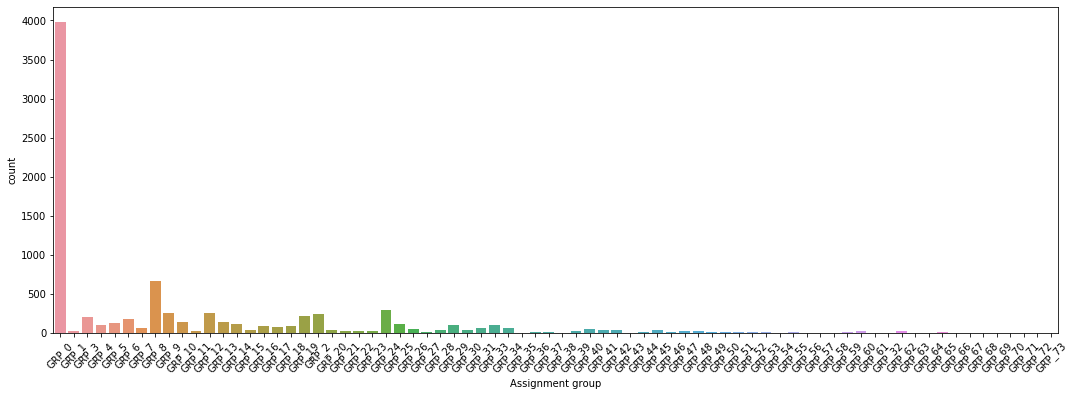

In [0]:
plt.figure(figsize=(18,6))
chart = sns.countplot(x = df['Assignment group'], data=df)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

###Number of unique callers

In [0]:
df['Caller'].nunique()

2950

In [0]:
# Top 15 Callers
df['Caller'].value_counts().head(15)

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
jloygrwh acvztedi     64
spxqmiry zpwgoqju     63
oldrctiu bxurpsyi     57
olckhmvx pcqobjnd     54
dkmcfreg anwmfvlg     51
jyoqwxhz clhxsoqy     51
efbwiadp dicafxhv     45
afkstcev utbnkyop     32
gzhapcld fdigznbk     30
mnlazfsr mtqrkhnx     28
Name: Caller, dtype: int64

###A crosstab view of caller and the assignment group

In [0]:
pd.crosstab(df['Caller'], df['Assignment group'], margins=True).head(10)

Assignment group,GRP_0,GRP_1,GRP_10,GRP_11,GRP_12,GRP_13,GRP_14,GRP_15,GRP_16,GRP_17,GRP_18,GRP_19,GRP_2,GRP_20,GRP_21,GRP_22,GRP_23,GRP_24,GRP_25,GRP_26,GRP_27,GRP_28,GRP_29,GRP_3,GRP_30,GRP_31,GRP_32,GRP_33,GRP_34,GRP_35,GRP_36,GRP_37,GRP_38,GRP_39,GRP_4,GRP_40,GRP_41,GRP_42,GRP_43,GRP_44,GRP_45,GRP_46,GRP_47,GRP_48,GRP_49,GRP_5,GRP_50,GRP_51,GRP_52,GRP_53,GRP_54,GRP_55,GRP_56,GRP_57,GRP_58,GRP_59,GRP_6,GRP_60,GRP_61,GRP_62,GRP_63,GRP_64,GRP_65,GRP_66,GRP_67,GRP_68,GRP_69,GRP_7,GRP_70,GRP_71,GRP_72,GRP_73,GRP_8,GRP_9,All
Caller,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DEsowkrH sciejzNE,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
HdOuWxAt qfKdlJMx,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
ZkBogxib QsEJzdZO,0,1,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,16,0,0,0,0,0,0,0,0,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,31,151
abiuclvj brziktno,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
abtknpew ifcekjdb,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
abyfsqod baezguci,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
acmglkti cwgxrabu,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
acqpinyd ecygimqd,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
acteiqdu bferalus,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


###Checking for NULL records

In [0]:
df.isnull().values.any()

True

In [0]:
df.isnull().sum().sum()

9

In [0]:
# checking for nulls
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

###Data having null values

In [0]:
df[df['Short description'].isnull() | df['Description'].isnull()]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


###Since null entries exists and they are very less as compared to the entire data, we decide to remove the null entries.


In [0]:
# only 0.1% data having nulls, so we can drop those records
df.dropna(inplace=True)
df.isnull().sum().sum()

0

###**Importing Libraries to Process Text data**

In [0]:
from nltk.tokenize import sent_tokenize, word_tokenize, PunktSentenceTokenizer
from nltk.tokenize import WordPunctTokenizer, WhitespaceTokenizer
from keras.preprocessing.text import Tokenizer
from nltk.probability import FreqDist

Using TensorFlow backend.


In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

###**Downloading library and creating list for stop words**

In [0]:
from nltk.corpus import stopwords
nltk.download('stopwords')
ensw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
import re    ## Library to clean data

In [0]:
### let's start working on a copied version of the dataframe
df_c = df.copy()

###**Creating additional metrics out of 'Description' field**

In [0]:
### Creating additional metrics out of 'Description' field

### counting number of words
df_c['desc_word_count'] = df_c['Description'].apply(lambda x: len(str(x).split(" ")))

### number of characters
df_c['desc_char_count'] = df_c['Description'].str.len()

### number of Stopwords
df_c['desc_stopwords'] = df_c['Description'].apply(lambda x: len([x for x in x.split() if x in ensw]))

### number of special characters
import string
special_chars = string.punctuation
# !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
df_c['desc_sp_char'] = df_c['Description'].apply(lambda x: len([x for x in x if x in special_chars]) )

### number of numerics
df_c['desc_numeric'] = df_c['Description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

### number of emails
df_c['desc_emails'] = df_c['Description'].apply(lambda x: len(re.findall(r'[\w\.-]+@[\w\.-]+', x)))

### Find date or timestamp counts
df_c['desc_datecount'] = df_c['Description'].apply(lambda x: len(re.findall(r'\d{2}/\d{2}/\d{4}', x)))

df_c[['Description', 'desc_word_count', 'desc_char_count', 'desc_stopwords', 'desc_sp_char', 'desc_numeric', 'desc_emails', 'desc_datecount']].head()

,Description,desc_word_count,desc_char_count,desc_stopwords,desc_sp_char,desc_numeric,desc_emails,desc_datecount
0,-verified user details.(employee# & manager na...,29,206,11,14,0,0,0
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,23,194,8,8,0,1,0
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,9,87,3,4,0,1,0
3,unable to access hr_tool page,5,29,1,1,0,0,0
4,skype error,3,12,0,0,0,0,0


In [0]:
print(special_chars)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [0]:
### count other special language and special characters
sp_char = '¢¤¥¦¨¬«®¶º»¼½¾¿ãäåæçèéïŒœŠšŸŽžƒ†‡•…'
df_c['desc_lang_sp_char'] = df_c['Description'].apply(lambda x: len(re.findall(r'[¢¤¥¦¨¬«®¶º»¼½¾¿ãäåæçèéïŒœŠšŸŽžƒ†‡•…]', x)))

### count if image was attached to the ticket
# Ex: df_c['Description'][8481]
df_c['desc_if_image'] = df_c['Description'].apply(lambda x: len(re.findall(r'cid:*', x)))

### count if there was a reference to another ticket
# Ex: df_c['Description'][8483]
df_c['desc_if_ref'] = df_c['Description'].apply(lambda x: len(re.findall(r'ref:*', x)))


df_c['desc_if_image'] = df_c['Description'].apply(lambda x: len(re.findall(r'cid:*', x)))


In [0]:
df_c['desc_if_image_all_types'] = df_c['Description'].apply(lambda x: len(re.findall(r'[\"|\'].*\.(?i:jpg|gif|png|bmp)[\"|\']', x)))
sum(df_c['desc_if_image_all_types'] )

1

###checking columns having same short and long description

In [0]:
compare_cols = df_c[df_c['Description'] == df_c['Short description']]
compare_cols.head(5)

,Short description,Description,Caller,Assignment group,desc_word_count,desc_char_count,desc_stopwords,desc_sp_char,desc_numeric,desc_emails,desc_datecount,desc_lang_sp_char,desc_if_image,desc_if_ref,desc_if_image_all_types
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,5,29,1,1,0,0,0,0,0,0,0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,3,12,0,0,0,0,0,0,0,0,0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,9,46,4,0,0,0,0,0,0,0,0
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,9,74,0,7,0,0,0,0,0,0,0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,7,36,2,0,0,0,0,0,0,0,0


###There are 2862 columns having same content in short and long descriptions

In [0]:
len(compare_cols)

2862

###Looking at the caller initials

In [0]:
df_c['Caller'].head(5)

0    spxjnwir pjlcoqds
1    hmjdrvpb komuaywn
2    eylqgodm ybqkwiam
3    xbkucsvz gcpydteq
4    owlgqjme qhcozdfx
Name: Caller, dtype: object

In [0]:
def Initials(my_string):
    l = []
    for i in my_string.split(' '):
        l.append(i[0])
    result = ''.join(l)
    return result
 

In [0]:
df_c['Caller_initals'] = df_c['Caller'].apply(Initials)

In [0]:
df_c[['Caller','Caller_initals']].head(5)

,Caller,Caller_initals
0,spxjnwir pjlcoqds,sp
1,hmjdrvpb komuaywn,hk
2,eylqgodm ybqkwiam,ey
3,xbkucsvz gcpydteq,xg
4,owlgqjme qhcozdfx,oq


###**There are 237 caller initials which match stop words**

In [0]:
df_c['Caller_initals_stopwords'] = df_c['Caller_initals'].apply(lambda x: len([x for x in x.split() if x in ensw]))
sum(df_c['Caller_initals_stopwords'])

237

In [0]:
df_c['Caller_initals_stopwords'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Caller_initals_stopwords, dtype: int64

In [0]:
Caller_initals_stopwords_count = df_c[df_c['Caller_initals_stopwords'] != 0]
Caller_initals_stopwords_count.head(5)

,Short description,Description,Caller,Assignment group,desc_word_count,desc_char_count,desc_stopwords,desc_sp_char,desc_numeric,desc_emails,desc_datecount,desc_lang_sp_char,desc_if_image,desc_if_ref,desc_if_image_all_types,Caller_initals,Caller_initals_stopwords
13,user wants to reset the password,user wants to reset the password,iftldbmu fujslwby,GRP_0,6,32,2,0,0,0,0,0,0,0,0,if,1
45,can not log into hr_tool etime through single ...,can not log into hr_tool etime through single ...,wpdxlbhz etvzjmhx,GRP_0,11,60,5,1,0,0,0,0,0,0,0,we,1
48,windows password change via password_managemen...,windows password change via password_managemen...,boyqfsca yoqrmnep,GRP_0,5,52,0,2,0,0,0,0,0,0,0,by,1
62,issues with outlook,\r\n\r\nreceived from: lkfzibrx.ljnabpgx@gmail...,lkfzibrx ljnabpgx,GRP_0,4,95,0,10,0,2,0,0,1,0,0,ll,1
155,reset passwords for hckvpary emxbpkwy using pa...,"employee is getting an error ""user authenticat...",hckvpary emxbpkwy,GRP_17,59,351,22,13,0,0,0,0,0,0,0,he,1


In [0]:
df_c[['Description', 'desc_lang_sp_char', 'desc_if_image', 'desc_if_ref']].tail()

,Description,desc_lang_sp_char,desc_if_image,desc_if_ref
8495,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,0,0,0
8496,telephony_software issue,0,0,0
8497,vip2: windows password reset for tifpdchb pedx...,0,0,0
8498,i am unable to access the machine utilities to...,0,0,0
8499,an mehreren pc`s lassen sich verschiedene prgr...,1,0,0


In [0]:
df_c[['Caller','Description'] ].head(5)

,Caller,Description
0,spxjnwir pjlcoqds,-verified user details.(employee# & manager na...
1,hmjdrvpb komuaywn,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...
2,eylqgodm ybqkwiam,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...
3,xbkucsvz gcpydteq,unable to access hr_tool page
4,owlgqjme qhcozdfx,skype error


###**1828 people have reported their own complaint.**

In [0]:
pd.options.display.max_rows = 20
for index, row in df_c.iterrows():
  firstname = row['Caller'].split()
  #print(firstname[0])
  if firstname[0] in  row['Description'] :
    df_c.loc[index,'caller_in_description'] = True
  else:
    df_c.loc[index,'caller_in_description'] = False

In [0]:
df_c['caller_in_description'].values

array([False,  True,  True, ..., False, False, False])

In [0]:
(df_c['caller_in_description'] == False).sum()

6663

In [0]:
(df_c['caller_in_description'] == True).sum()

1828

**178 people have reported for others**

In [0]:
# caller name but not the same as reported in description
# new data frame with split value columns 
new = df_c['Caller'].str.split(" ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
df_c["First_Name"]= new[0] 
df_c["First_Name"].head(5)

0    spxjnwir
1    hmjdrvpb
2    eylqgodm
3    xbkucsvz
4    owlgqjme
Name: First_Name, dtype: object

In [0]:
len(df_c["First_Name"].unique())

2948

In [0]:
unique_firstnames=df_c["First_Name"].unique()

In [0]:
for index, row in df_c.iterrows():
  for name in unique_firstnames:
    if name in row['Description']:
      df_c.loc[index, "callername_in_desc"]= True
      break

In [0]:
df_c['callername_in_desc'].head(6)

0     NaN
1    True
2    True
3     NaN
4     NaN
5     NaN
Name: callername_in_desc, dtype: object

In [0]:
(df_c['callername_in_desc'] == True).sum()

2006

In [0]:
2006-1828

178

###Bar chart showing the comparative counts of stopwords, characters, words and special characters

In [0]:
df_c[['Description', 'desc_lang_sp_char', 'desc_if_image', 'desc_if_ref']].tail()

,Description,desc_lang_sp_char,desc_if_image,desc_if_ref
8495,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,0,0,0
8496,telephony_software issue,0,0,0
8497,vip2: windows password reset for tifpdchb pedx...,0,0,0
8498,i am unable to access the machine utilities to...,0,0,0
8499,an mehreren pc`s lassen sich verschiedene prgr...,1,0,0


In [0]:
values_sum1=sum(df_c[[ 'desc_word_count', 'desc_char_count', 'desc_stopwords', 'desc_sp_char']].values)
values_sum1

array([ 245274, 1732858,   60672,  142209])

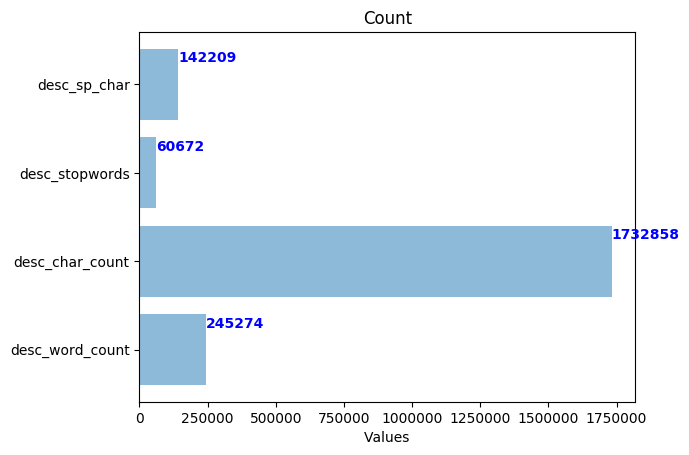

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects1 = ('desc_word_count', 'desc_char_count', 'desc_stopwords', 'desc_sp_char')
y_pos1 = np.arange(len(objects1))
val_sum1 = values_sum1

plt.barh(y_pos1, val_sum1, align='center', alpha=0.5)
plt.yticks(y_pos1, objects1)
plt.xlabel('Values')
plt.title('Count')

for i, val_sum1 in enumerate(val_sum1):
    plt.text(val_sum1 + 3, i + .25, str(val_sum1), color='blue', fontweight='bold')

plt.show()


###Total count of special characters, numbers, emails, datecount, hyperlinks, language

In [0]:
values_sum2=sum(df_c[[  'desc_sp_char','desc_numeric', 'desc_emails', 'desc_datecount','desc_if_ref','desc_lang_sp_char']].values)
values_sum2

array([142209,   6224,   3935,    891,    229,   8485])

###Bar chart of the above count

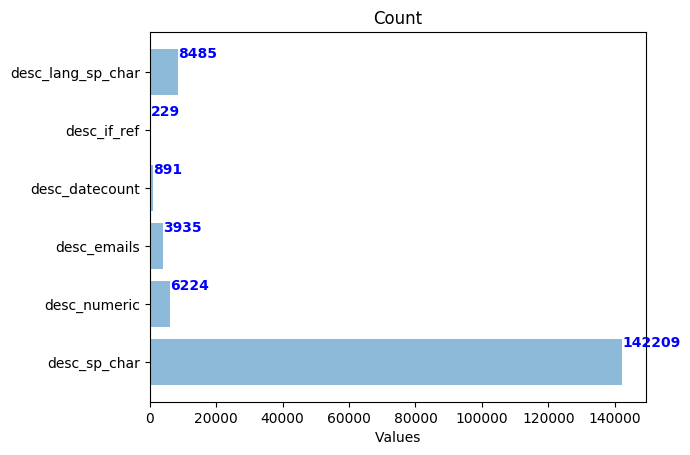

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects2 = (  'desc_sp_char','desc_numeric', 'desc_emails', 'desc_datecount','desc_if_ref','desc_lang_sp_char')
y_pos2 = np.arange(len(objects2))
val_sum2 = values_sum2

plt.barh(y_pos2, values_sum2, align='center', alpha=0.5)
plt.yticks(y_pos2, objects2)
plt.xlabel('Values')
plt.title('Count')

for i, val_sum2 in enumerate(val_sum2):
    plt.text(val_sum2 + 3, i + .25, str(val_sum2), color='blue', fontweight='bold')

plt.show()


###Removing the newlines, tabs and carriage return

In [0]:
df_c['Description_without_newlines_tabs_carriage']=df_c['Description'].replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True)
df_c['Description_without_newlines_tabs_carriage'].head(5)

0    -verified user details.(employee# & manager na...
1    received from: hmjdrvpb.komuaywn@gmail.comhell...
2    received from: eylqgodm.ybqkwiam@gmail.comhii ...
3                        unable to access hr_tool page
4                                         skype error 
Name: Description_without_newlines_tabs_carriage, dtype: object

###Installing spacy-langdetect for detecting languages



In [0]:
!pip install spacy-langdetect

     |████████████████████████████████| 1.0MB 2.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-cp36-none-any.whl size=993459 sha256=d2cdf00fb0256e0d8c0b5330a5da94aee039f89e4da887047b7e8b17bc22cf17
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
Successfully built langdetect


In [0]:
import spacy
from spacy_langdetect import LanguageDetector
nlp = spacy.load('en')
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)
df_c['spacy_col'] = df_c['Description_without_newlines_tabs_carriage'].apply(lambda x: nlp(x))

In [0]:
df_c['spacy_col'].head(5)

0    (-verified, user, details.(employee, #, &, man...
1    (received, from, :, hmjdrvpb.komuaywn@gmail.co...
2    (received, from, :, eylqgodm.ybqkwiam@gmail.co...
3                  (unable, to, access, hr_tool, page)
4                                       (skype, error)
Name: spacy_col, dtype: object

In [0]:
pip install pycountry

     |████████████████████████████████| 10.0MB 3.3MB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=ec5ad9f620dba468fd6cfae078cf233f9da52dc8d507693cc0a087774c34bcb4
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry


In [0]:
j=0
text_arr=[]
text_label=[]
text_lang=[]

from textblob import TextBlob
import pycountry
from langdetect import detect

df_spacy = pd.DataFrame(columns = ['text_arr', 'text_label','text_lang','lang_textblob','sentence_clean']) 

for index, row in df_c.iterrows():
    doc=row['spacy_col']
    
    row_lang=doc._.language
    
    try:
        TextBlob_lang = TextBlob(detect(row['Description_without_newlines_tabs_carriage']))
    except:
        TextBlob_lang = "error"
    
    df_spacy.loc[j, "language"] = row_lang.get('language')
    df_spacy.loc[j, "score"] = row_lang.get('score')
    df_spacy.loc[j, "sentence_clean"] = row['Description_without_newlines_tabs_carriage']
    df_spacy.loc[j, "lang_textblob"] = str(TextBlob_lang)

    j=j+1
    text_arr.clear()
    text_label.clear()
    text_lang.clear()

In [0]:
df_spacy[['language','sentence_clean','score']].head(5)

,language,sentence_clean,score
0,en,-verified user details.(employee# & manager na...,0.999995
1,en,received from: hmjdrvpb.komuaywn@gmail.comhell...,0.999997
2,en,received from: eylqgodm.ybqkwiam@gmail.comhii ...,0.999995
3,en,unable to access hr_tool page,0.714283
4,no,skype error,0.999995


###Pie chart with respect to distribution of language words throughout the text

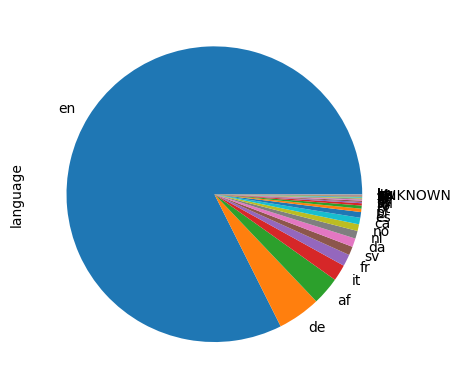

In [0]:
df_spacy['language'].value_counts().plot(kind='pie')

###All the unique languages found in the description text

In [0]:
df_spacy['language'].unique()

array(['en', 'no', 'fr', 'it', 'es', 'af', 'ca', 'sv', 'da', 'nl', 'de',
       'tl', 'pl', 'sl', 'cy', 'id', 'et', 'pt', 'sq', 'so', 'ro', 'hr',
       'tr', 'sk', 'sw', 'fi', 'lt', 'cs', 'lv', 'hu', 'UNKNOWN'],
      dtype=object)

###Count of entries on the basis of language



In [0]:
df_spacy['language'].value_counts(dropna=False).head(5)

en    6997
de     399
af     261
it     152
fr     110
Name: language, dtype: int64

###Description data with different languages

In [0]:
lang_filter = df_spacy[df_spacy['language']=='de' ]
lang_filter.head(5)

,text_arr,text_label,text_lang,lang_textblob,sentence_clean,language,score
133,NaN,NaN,NaN,de,install driver in printer hr14 in HostName_769,de,0.571428
223,NaN,NaN,NaN,de,"hallo ,es ist erneut passiert. der pc hat sich...",de,0.999997
251,NaN,NaN,NaN,de,bitte passwort fÃ¼r fygrwuna gomcekzi e-mail z...,de,0.857138
265,NaN,NaN,NaN,de,received from: fcyuqvoj.ajqeidlm@gmail.comhall...,de,0.999998
270,NaN,NaN,NaN,de,neues passwort fÃ¼r accountname tgryhu hgygrtu...,de,0.999996


In [0]:
lang_filter = df_spacy[df_spacy['language']=='af' ]
lang_filter.head(5)

,text_arr,text_label,text_lang,lang_textblob,sentence_clean,language,score
25,NaN,NaN,NaN,af,erp SID_37 password reset,af,0.999996
33,NaN,NaN,NaN,af,ess password reset,af,0.600050
52,NaN,NaN,NaN,af,i need my password_management_tool password ma...,af,0.999994
154,NaN,NaN,NaN,af,vpn not working.,af,0.999996
192,NaN,NaN,NaN,af,password reset,af,0.999994


In [0]:
lang_filter = df_spacy[df_spacy['language']=='it' ]
lang_filter.head(5)

,text_arr,text_label,text_lang,lang_textblob,sentence_clean,language,score
19,NaN,NaN,NaN,it,unable to sign into vpn,it,0.999996
29,NaN,NaN,NaN,it,unable to log in to erp SID_34,it,0.714283
44,NaN,NaN,NaN,it,unable to login to hr_tool etime,it,0.857139
131,NaN,NaN,NaN,it,unable to access vpn,it,0.999997
145,NaN,NaN,NaN,fr,qifzkoej etbmgjvo is unable to start his dell ...,it,0.428571


In [0]:
lang_filter = df_spacy[df_spacy['language']=='fr' ]
lang_filter.head(5)

,text_arr,text_label,text_lang,lang_textblob,sentence_clean,language,score
14,NaN,NaN,NaN,fr,unable to open payslips,fr,0.571426
169,NaN,NaN,NaN,fr,account unlock request.,fr,0.857141
190,NaN,NaN,NaN,ca,password reset request,fr,0.571428
213,NaN,NaN,NaN,fr,loud noise // gso,fr,0.999997
219,NaN,NaN,NaN,fr,contact phone,fr,0.999996


In [0]:
lang_filter = df_spacy[df_spacy['language']=='sv' ]
lang_filter.head(5)

,text_arr,text_label,text_lang,lang_textblob,sentence_clean,language,score
40,NaN,NaN,NaN,sv,ticket update - inplant_874615,sv,0.857139
311,NaN,NaN,NaN,sv,ticket update,sv,0.999996
608,NaN,NaN,NaN,sv,funktionsstÃ¶rung,sv,0.714283
628,NaN,NaN,NaN,sv,"office excel ,powerpoint æ‰“å¼€ä¸€äº›æ–‡ä»¶æ—¶...",sv,0.714285
814,NaN,NaN,NaN,en,ticket update inplant_871302,sv,0.714283


In [0]:
lang_filter = df_spacy[df_spacy['language']=='da' ]
lang_filter.head(5)

,text_arr,text_label,text_lang,lang_textblob,sentence_clean,language,score
126,NaN,NaN,NaN,en,blank call //gso,da,0.526523
164,NaN,NaN,NaN,da,received from: abcdri@company.comwindy shi å°†...,da,0.428571
276,NaN,NaN,NaN,da,outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...,da,0.999997
469,NaN,NaN,NaN,ca,ieæµè§ˆå™¨æ‰“å¼€crmç³»ç»ŸåŽæç¤ºç”¨æˆ·å·²è¢...,da,0.714284
487,NaN,NaN,NaN,da,please provide details of the issue.[â€Ž2016/â...,da,0.714262


In [0]:
lang_filter = df_spacy[df_spacy['language']=='es' ]
lang_filter.head(5)

,text_arr,text_label,text_lang,lang_textblob,sentence_clean,language,score
22,NaN,NaN,NaN,es,unable to connect to vpn,es,0.571426
88,NaN,NaN,NaN,es,unable to open ie,es,0.714282
118,NaN,NaN,NaN,es,unable to display expense report,es,0.999994
123,NaN,NaN,NaN,es,unable to display expense report,es,0.999996
181,NaN,NaN,NaN,es,unable to connect to vpn,es,0.714282


In [0]:
df_spacy.head(5)

,text_arr,text_label,text_lang,lang_textblob,sentence_clean,language,score
0,NaN,NaN,NaN,en,-verified user details.(employee# & manager na...,en,0.999995
1,NaN,NaN,NaN,en,received from: hmjdrvpb.komuaywn@gmail.comhell...,en,0.999997
2,NaN,NaN,NaN,en,received from: eylqgodm.ybqkwiam@gmail.comhii ...,en,0.999995
3,NaN,NaN,NaN,en,unable to access hr_tool page,en,0.714283
4,NaN,NaN,NaN,no,skype error,no,0.999995


##**Only English and German are correctly detected rest others do not exist**

In [0]:
all_lang_data=df_spacy['text_lang']

In [0]:
type(all_lang_data)

pandas.core.series.Series

In [0]:
df_tt = pd.DataFrame(df_spacy['text_lang'].tolist())

In [0]:
df_tt.head(5)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [0]:
df_spacy['text_lang'].tolist();

In [0]:
df_spacy['sentence_clean'].values

array(['-verified user details.(employee# & manager name)-checked the user name in ad and reset the password.-advised the user to login and check.-caller confirmed that he was able to login.-issue resolved.',
       'received from: hmjdrvpb.komuaywn@gmail.comhello team,my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?kind ',
       'received from: eylqgodm.ybqkwiam@gmail.comhii cannot log on to vpnbest ',
       ..., 'vip2: windows password reset for tifpdchb pedxruyf',
       'i am unable to access the machine utilities to finish the drawers adjustment settings.is no network..',
       'an mehreren pc`s lassen sich verschiedene prgramdntyme nicht Ã¶ffnen. bereich cnc.'],
      dtype=object)

### Using numpy percentile to conclude the maximum number of words and characters to be used for the Input data to the LSTM model

In [0]:
np.percentile(df_c['desc_word_count'], 90)

55.0

In [0]:
np.percentile(df_c['desc_word_count'], 95)

96.0

In [0]:
np.percentile(df_c['desc_word_count'], 99)

250.0

In [0]:
np.percentile(df_c['desc_char_count'], 90)

395.0

In [0]:
np.percentile(df_c['desc_char_count'], 95)

676.5

In [0]:
np.percentile(df_c['desc_char_count'], 99)

1318.300000000001

In [0]:
df_c['desc_word_count'].head()

0    29
1    23
2     9
3     5
4     3
Name: desc_word_count, dtype: int64

In [0]:
sp_char = '[^a-zA-Z0-9\s]'
df_c['non_english_words'] = df_c['Description_without_newlines_tabs_carriage'].apply(lambda x: len(re.findall(r'[^a-zA-Z0-9\s]', x)))
df_c['non_english_words'].head()

0    14
1     8
2     4
3     1
4     0
Name: non_english_words, dtype: int64

In [0]:
sum(df_c['non_english_words'] )

157897

In [0]:
non_english_words = df_c[df_c['non_english_words'] != 0]
non_english_words.head(5)

,Short description,Description,Caller,Assignment group,desc_word_count,desc_char_count,desc_stopwords,desc_sp_char,desc_numeric,desc_emails,desc_datecount,desc_lang_sp_char,desc_if_image,desc_if_ref,desc_if_image_all_types,Caller_initals,Caller_initals_stopwords,caller_in_description,First_Name,callername_in_desc,Description_without_newlines_tabs_carriage,spacy_col,non_english_words
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,29,206,11,14,0,0,0,0,0,0,0,sp,0,False,spxjnwir,NaN,-verified user details.(employee# & manager na...,"(-verified, user, details.(employee, #, &, man...",14
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,23,194,8,8,0,1,0,0,0,0,0,hk,0,True,hmjdrvpb,True,received from: hmjdrvpb.komuaywn@gmail.comhell...,"(received, from, :, hmjdrvpb.komuaywn@gmail.co...",8
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,9,87,3,4,0,1,0,0,0,0,0,ey,0,True,eylqgodm,True,received from: eylqgodm.ybqkwiam@gmail.comhii ...,"(received, from, :, eylqgodm.ybqkwiam@gmail.co...",4
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,5,29,1,1,0,0,0,0,0,0,0,xg,0,False,xbkucsvz,NaN,unable to access hr_tool page,"(unable, to, access, hr_tool, page)",1
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,11,153,4,15,1,0,0,0,0,0,0,jc,0,False,jyoqwxhz,NaN,event: critical:HostName_221.company.com the v...,"(event, :, critical, :, HostName_221.company.c...",15


In [0]:
non_english_words['Description'][99]

'\n\nreceived from: ecprjbod.litmjwsy@gmail.com\n\nmy system says my password expires tomorrow.  but when i want to change to a new password, it does not allow.  the new password is not acceptingâ€¦.it says server does not authorize.  kindly check and do the needful as the password is expiring tomorrow.  '

In [0]:
non_english_words['Description'][8480]

'\r\n\r\nreceived from: nlearzwi.ukdzstwi@gmail.com\r\n\r\nhello,\r\n\r\na business decision has recently been made to view mfg_tooltion (customer classification ik) as indirect sales going forward. currently in the bex system they are classified as direct.\r\n\r\ncan you please modify the "cust grp 1 â€“ enhanced" field (0cust_sales__zcustgrp1) to show mfg_tooltion (customer classification ik) customers as indirect.\r\n[cid:image001.png@01d1ee74.cc06a6a0]\r\n\r\nthis field is used in several bex and hana reports (sales v plan, product management, otc billings, etc). let me know if you have any questions.\r\n\r\nbest '

### Histographic Distribution for newly created matrix



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8091e8b9e8>,
      dtype=object)

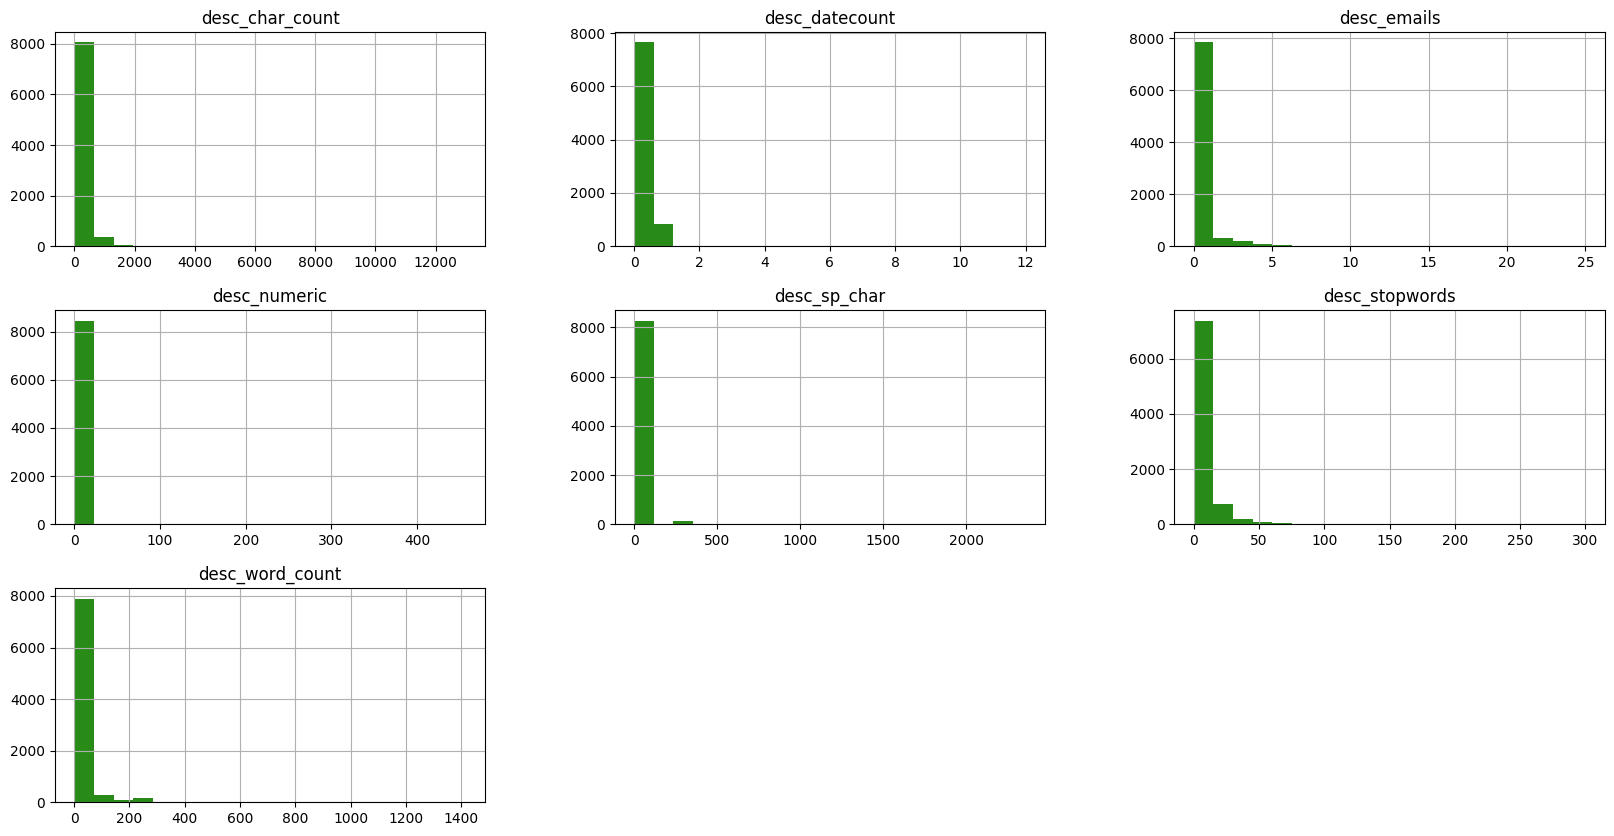

In [0]:
df_c[['desc_word_count', 'desc_char_count', 'desc_stopwords', 'desc_sp_char', 
      'desc_numeric', 'desc_emails', 'desc_datecount']].hist(bins=20, figsize=(20,10), color='#298B17')

###Additional metrics from 'Short Description'

In [0]:
### Let's create additional metrics out of 'Short Description'

### counting number of words
df_c['shdesc_word_count'] = df_c['Short description'].apply(lambda x: len(str(x).split(" ")))

### number of characters
df_c['shdesc_char_count'] = df_c['Short description'].str.len()

### number of Stopwords
df_c['shdesc_stopwords'] = df_c['Short description'].apply(lambda x: len([x for x in x.split() if x in ensw]))

### number of special characters
df_c['shdesc_sp_char'] = df_c['Short description'].apply(lambda x: len([x for x in x if x in special_chars]) )

### count other language character and special characters
sp_char = '¢¤¥¦¨¬«®¶º»¼½¾¿ãäåæçèéïŒœŠšŸŽžƒ†‡•…'
df_c['shdesc_lang_sp_char'] = df_c['Short description'].apply(lambda x: 1 if (re.findall(r'[¢¤¥¦¨¬«®¶º»¼½¾¿ãäåæçèéïŒœŠšŸŽžƒ†‡•…]', x)) else 0)

### count if job number or ticket number or host name is part of Short Description
df_c['shdesc_if_job'] = df_c['Short description'].apply(lambda x: 1 if (re.findall(r'job_*', x)) else 0)


df_c[['Short description', 'shdesc_word_count', 'shdesc_char_count', 'shdesc_stopwords', 'shdesc_sp_char', 'shdesc_lang_sp_char', 'shdesc_if_job']].head()

,Short description,shdesc_word_count,shdesc_char_count,shdesc_stopwords,shdesc_sp_char,shdesc_lang_sp_char,shdesc_if_job
0,login issue,2,11,0,0,0,0
1,outlook,1,7,0,0,0,0
2,cant log in to vpn,5,18,2,0,0,0
3,unable to access hr_tool page,5,29,1,1,0,0
4,skype error,3,12,0,0,0,0


In [0]:
df_c['shdesc_if_job'].value_counts(normalize=True)*100

0    88.305264
1    11.694736
Name: shdesc_if_job, dtype: float64

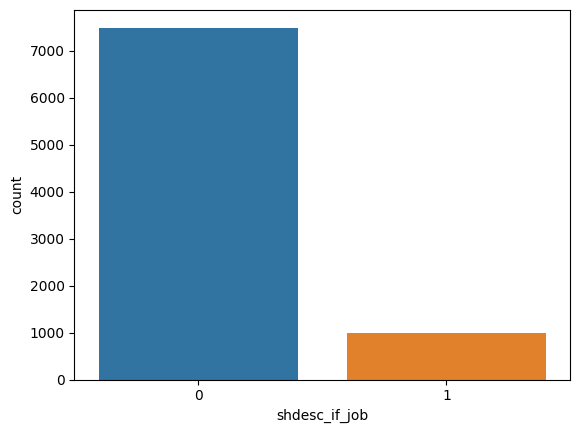

In [0]:
sns.countplot(df_c['shdesc_if_job'])

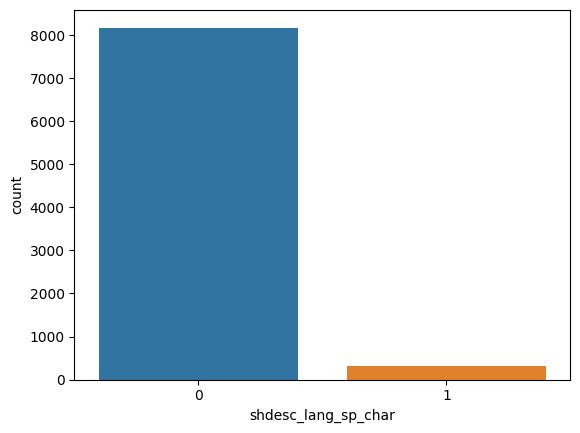

In [0]:
sns.countplot(df_c['shdesc_lang_sp_char'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80901448d0>,
      dtype=object)

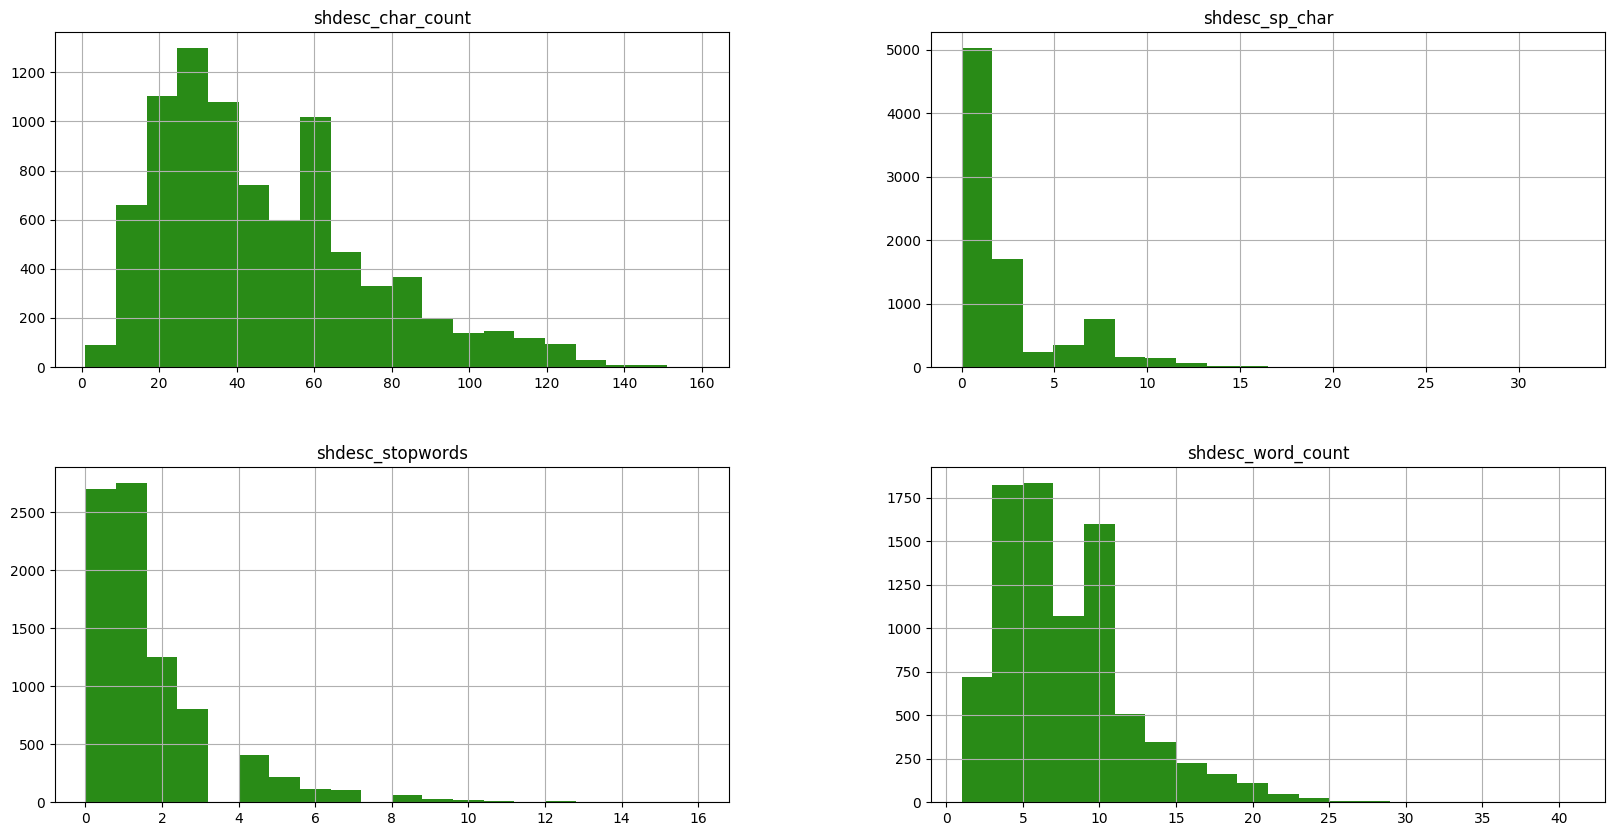

In [0]:
df_c[['shdesc_word_count', 'shdesc_char_count', 'shdesc_stopwords', 'shdesc_sp_char']].hist(bins=20, figsize=(20,10), color='#298B17')

###Scatter plot to show if Image references has been given in tickets where job/hostname/ticket numbers are mentioned

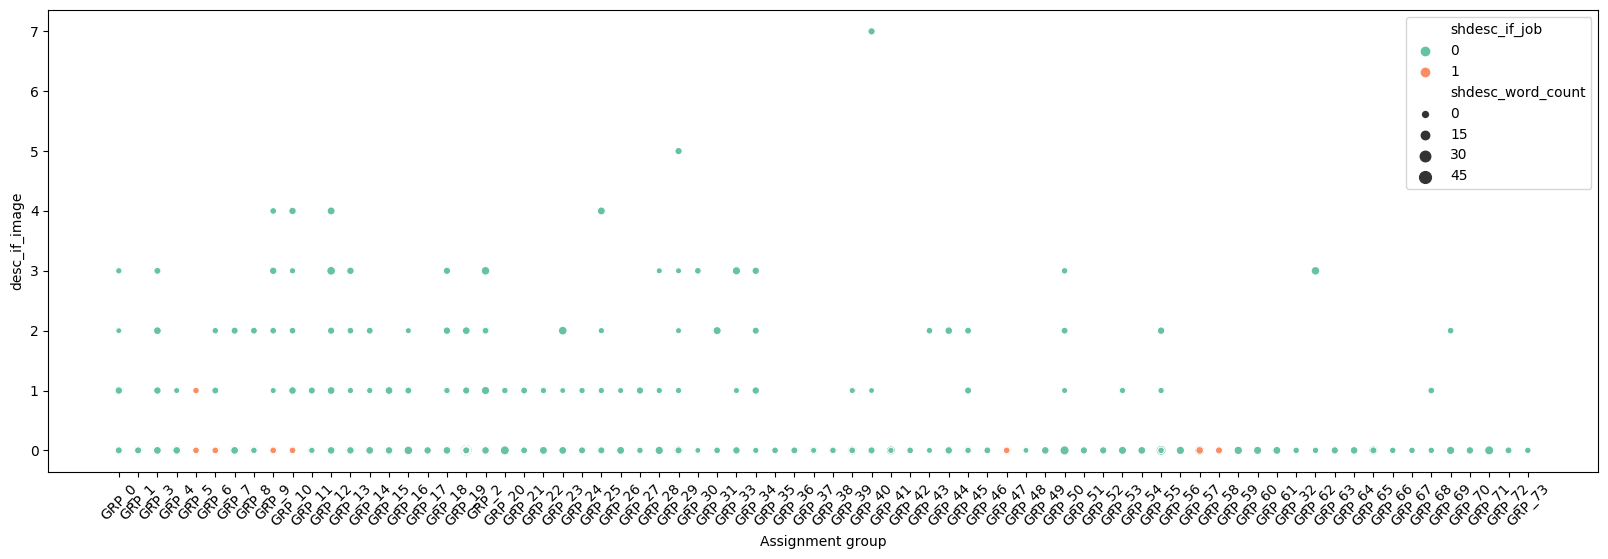

In [0]:
plt.figure(figsize=(20,6))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="Assignment group", y="desc_if_image",
                     hue="shdesc_if_job", size="shdesc_word_count",
                     palette="Set2",
                     data=df_c)
plt.xticks(rotation=45)
plt.show()

In [0]:
np.percentile(df_c['shdesc_word_count'], 90)

13.0

In [0]:
np.percentile(df_c['shdesc_word_count'], 95)

16.0

In [0]:
np.percentile(df_c['shdesc_word_count'], 99)

21.0

In [0]:
np.percentile(df_c['shdesc_char_count'], 90)

84.0

In [0]:
np.percentile(df_c['shdesc_char_count'], 95)

102.0

In [0]:
np.percentile(df_c['shdesc_char_count'], 99)

123.0

###**Additional EDA out of Frequency Distribution**

In [0]:
# concat all the Description content
Desc = df['Description'].str.cat(sep='')

In [0]:
# Split sentence into words
tokens = word_tokenize(Desc)

# sorting, removing duplicats and storing in vocab
vocab = set(tokens)

In [0]:
print(len(tokens))
print(len(vocab))

287181
27610


In [0]:
### creating a frequency Distribution for all the words from Description column

freq_dist = nltk.FreqDist(tokens)
sorted(freq_dist,key=freq_dist.__getitem__, reverse=True)[0:10]

[':', '.', 'to', ',', 'the', ')', '(', '@', 'from', 'in']

In [0]:
from nltk.probability import FreqDist
fdist = FreqDist()

In [0]:
# converting all words to lower case
for word in tokens:
  fdist[word.lower()]+=1

In [0]:
# Earlier we see, the distinct vocab length was 27621; after converting to lower we get 27605
len(fdist)

27605

In [0]:
# to know frequncy of a specific word
print(fdist['password'])
print(fdist['login'])

1059
506


###Top 10 words with highest frequency

In [0]:
freq_top10 = fdist.most_common(10)
freq_top10

[(':', 12246),
 ('.', 7998),
 ('to', 6544),
 (',', 6353),
 ('the', 6222),
 (')', 4547),
 ('(', 4433),
 ('@', 3988),
 ('from', 3222),
 ('in', 3202)]

#**Conclusion** :
##1. *Our description had wide variety of text incuding foreign languages, special characters, emails, hyperlinks, new line, carriage returns etc.*
##2. *we have tried identify irrelevant stuff from the data, while the important text remains will help us categorize the ticket for assigning to the groups.*

